In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
L = []
for i in range(10000):
    L.append(random.randint(1,6))

In [4]:
len(L)

10000

In [5]:
L[:5]

[1, 5, 5, 6, 2]

In [6]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

<Axes: >

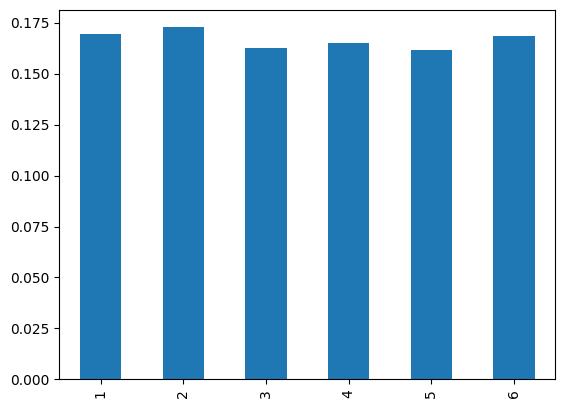

In [7]:
s.plot(kind='bar')

In [8]:
L = []
for i in range(10000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    
    L.append( a + b )

In [9]:
len(L)

10000

In [10]:
L[:5]

[6, 10, 8, 6, 9]

In [11]:
r = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

<Axes: >

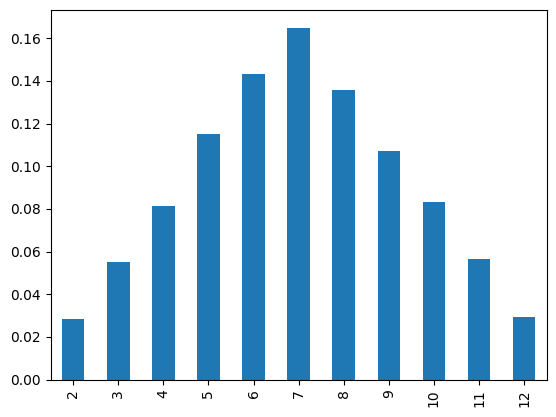

In [12]:
r.plot(kind='bar')

In [39]:
q = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [40]:
np.cumsum(q)

2     0.0284
3     0.0834
4     0.1648
5     0.2797
6     0.4231
7     0.5881
8     0.7239
9     0.8312
10    0.9143
11    0.9707
12    1.0000
Name: count, dtype: float64

<Axes: >

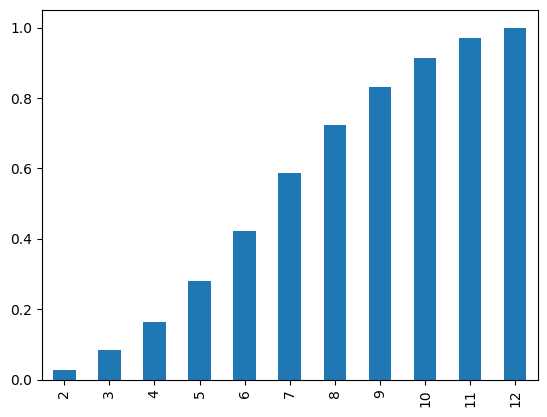

In [41]:
np.cumsum(q).plot(kind='bar')

# Parametric Density Estimation

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import normal
import numpy as np

In [ ]:
sample = normal(loc=50, scale=5,size=1000)

In [14]:
sample.mean()

np.float64(49.96949913917917)

(array([  3.,  22.,  73., 154., 234., 239., 155.,  82.,  30.,   8.]),
 array([33.73073439, 36.92505651, 40.11937863, 43.31370075, 46.50802287,
        49.70234499, 52.89666711, 56.09098923, 59.28531135, 62.47963347,
        65.67395559]),
 <BarContainer object of 10 artists>)

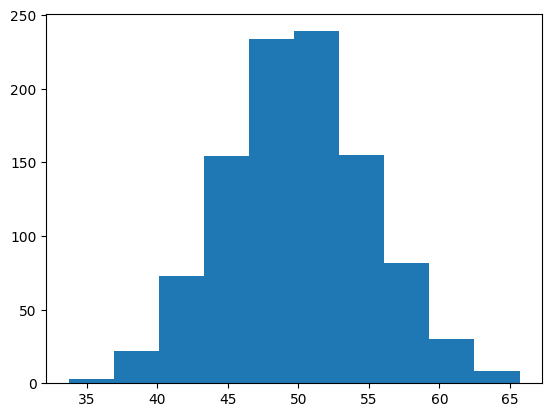

In [15]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [16]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [17]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [18]:
values = np.linspace(sample.min(),sample.max(),100)

In [19]:
sample.max()

np.float64(65.67395559012633)

In [20]:
probabilities = [dist.pdf(value) for value in values]

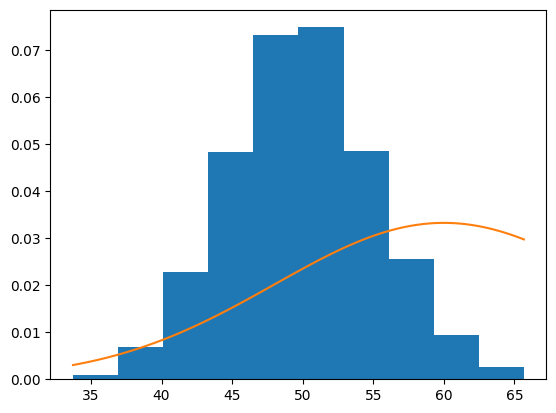

In [21]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

C:\Users\ACER\AppData\Local\Temp\ipykernel_15372\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

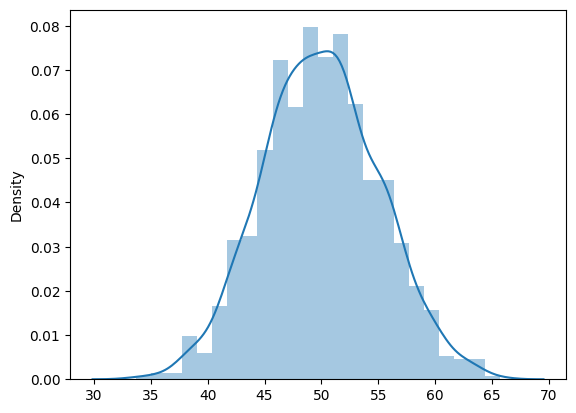

In [22]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [23]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [24]:
sample

array([14.02458815, 22.10238727, 23.60505445, 27.40778465, 24.95428128,
        9.86029654, 21.77040541, 20.97026654, 18.73603273, 26.79462161,
       23.86733311, 19.72862151, 28.25081076, 12.66593603, 20.62547054,
       15.20193767, 23.72080627, 27.66252091, 25.66879374, 14.77134432,
       25.32774736, 24.47632626, 13.94161175, 18.24899168, 20.48577361,
       13.95907608, 11.96839072, 17.43446896, 24.4796235 , 18.14643954,
       29.04720315, 23.69218981, 20.06069147, 11.42628739, 19.69710548,
       16.87391959, 19.92602112, 22.41752101, 17.97554079, 18.66127721,
        9.46266189, 14.75664699, 17.39970176, 22.05669002, 17.82290183,
       16.19861711, 14.1951491 , 23.16584919, 25.08090524, 17.97325326,
       18.98015781, 15.14373922, 12.56529094, 24.22324912, 22.71416624,
       21.929769  , 14.686313  , 17.65111746, 25.04587123, 19.94167563,
       23.56392949, 23.29626542, 18.92219873, 31.39939995, 24.25749033,
       21.23611905, 20.91364158, 18.07123489, 21.72609433, 17.14

(array([ 2.,  3.,  3.,  1.,  7., 15., 15., 12., 18., 20., 24., 13., 24.,
        18., 17., 22., 25., 21.,  9.,  7., 13., 10., 10.,  9., 14., 15.,
        25., 23., 22., 37., 45., 60., 49., 56., 35., 37., 46., 44., 44.,
        28., 22., 26., 20., 12., 11.,  3.,  5.,  0.,  1.,  2.]),
 array([ 8.69883759,  9.61317066, 10.52750373, 11.44183679, 12.35616986,
        13.27050292, 14.18483599, 15.09916906, 16.01350212, 16.92783519,
        17.84216826, 18.75650132, 19.67083439, 20.58516745, 21.49950052,
        22.41383359, 23.32816665, 24.24249972, 25.15683279, 26.07116585,
        26.98549892, 27.89983198, 28.81416505, 29.72849812, 30.64283118,
        31.55716425, 32.47149732, 33.38583038, 34.30016345, 35.21449651,
        36.12882958, 37.04316265, 37.95749571, 38.87182878, 39.78616185,
        40.70049491, 41.61482798, 42.52916104, 43.44349411, 44.35782718,
        45.27216024, 46.18649331, 47.10082637, 48.01515944, 48.92949251,
        49.84382557, 50.75815864, 51.67249171, 52.58682477,

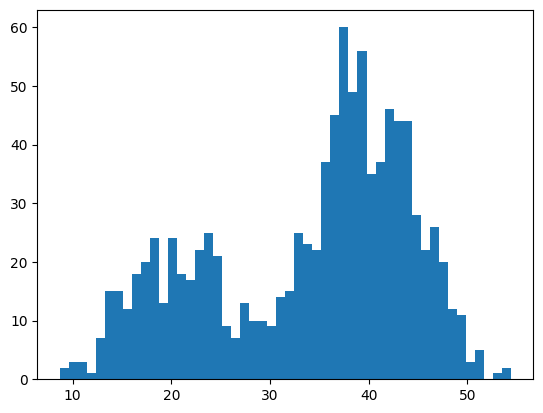

In [25]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [26]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [27]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [28]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

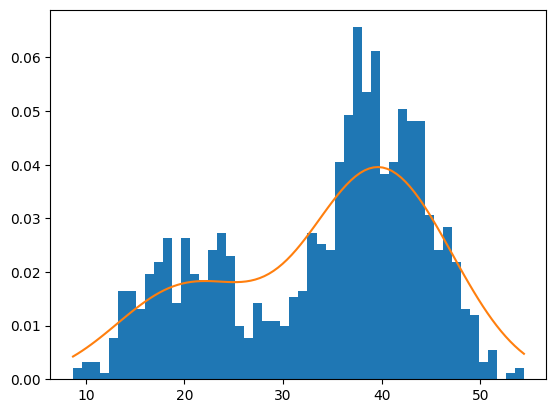

In [29]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

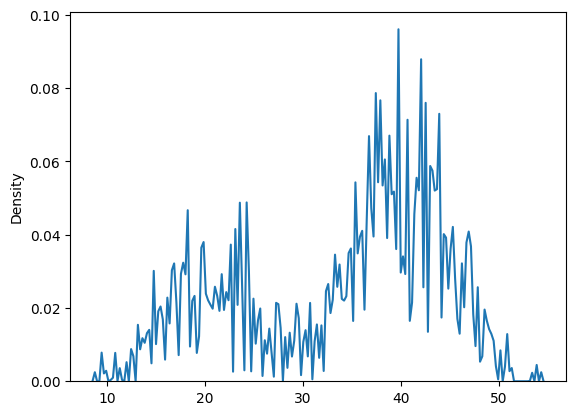

In [30]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [31]:
import seaborn as sns

In [32]:
df = sns.load_dataset('iris')

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

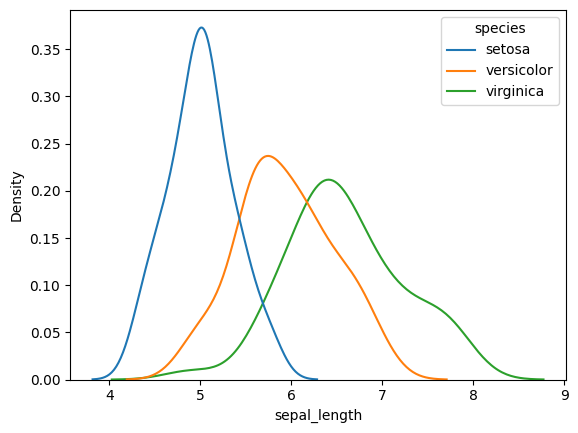

In [34]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

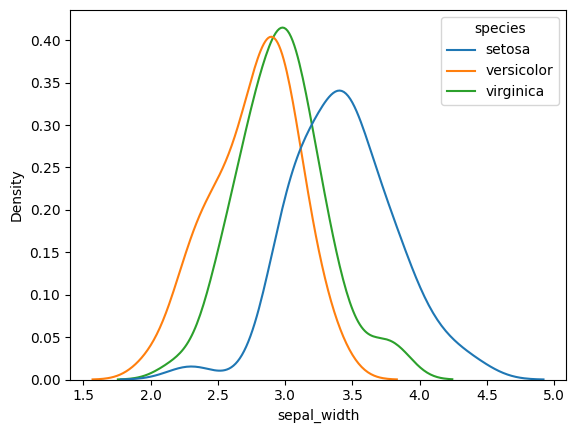

In [35]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

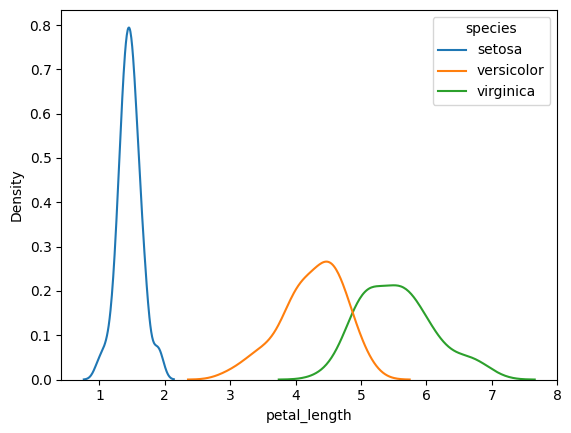

In [36]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

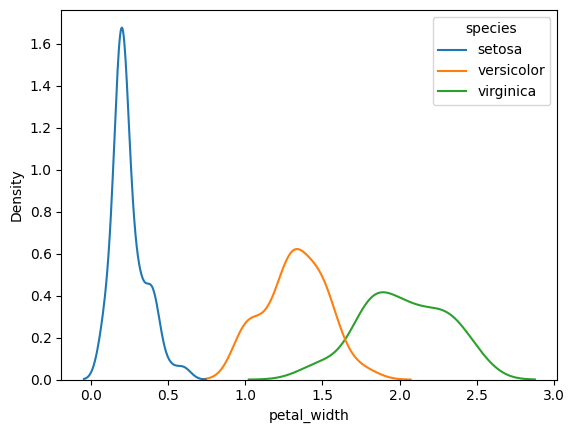

In [37]:
sns.kdeplot(data=df,x='petal_width',hue='species')

In [38]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic.head()

In [ ]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

In [ ]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

In [ ]:
sns.kdeplot(titanic['Age'])

In [ ]:
titanic['Age'].mean()

In [ ]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

In [ ]:
sns.kdeplot(x)

In [ ]:
x.mean()

In [ ]:
x.std()

In [ ]:
titanic['Age'].skew()

In [ ]:
titanic['Age'].mean() + 3*titanic['Age'].std()

In [ ]:
titanic['Age'].mean() - 3*titanic['Age'].std()

In [ ]:
titanic[titanic['Age'] > 73]

In [ ]:
titanic['Age'].max()